## 2. Create a StateGraph

Now you can create a basic chatbot using LangGraph. This chatbot will respond directly to user messages.

Start by creating a StateGraph. A StateGraph object defines the structure of our chatbot as a "state machine". We'll add nodes to represent the llm and functions our chatbot can call and edges to specify how the bot should transition between these functions.

API Reference: StateGraph | START | END | add_messages

In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict): 
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

Our graph can now handle two key tasks:

Each node can receive the current State as input and output an update to the state.
Updates to messages will be appended to the existing list rather than overwriting it, thanks to the prebuilt add_messages function used with the Annotated syntax.

### Concept
> When defining a graph, the first step is to define its State. The State includes the graph's schema and reducer functions that handle state updates. In our example, State is a TypedDict with one key: messages. The add_messages reducer function is used to append new messages to the list instead of overwriting it. Keys without a reducer annotation will overwrite previous values. To learn more about state, reducers, and related concepts, see LangGraph reference docs.

In [1]:
from langchain_openai import ChatOpenAI
import os
llm = ChatOpenAI(
    base_url=os.getenv("LLM_BASE_URL"),
    api_key=os.getenv("LLM_API_KEY"),
    model='qwen-plus-latest',
    streaming=True
)

/Users/daijunjie/miniconda3/envs/langchain-env/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## Add a node

In [ ]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)


## 4. Add an entry point

In [4]:
# Add an entry point to tell the graph where to start its work each time it is run:
graph_builder.add_edge(START, "chatbot")

## 5. Add an exit point

In [5]:
graph_builder.add_edge("chatbot", END)

In [6]:
graph = graph_builder.compile()

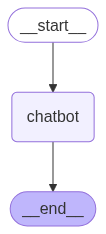

In [7]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

## Run the chatbot

In [9]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: 我们一步一步来分析：9.11 和 9.8 哪个更大？

### 第一步：理解小数的比较规则
比较两个小数的大小，要从左到右逐位比较，先看整数部分，再看小数部分。

### 第二步：比较整数部分
- 9.11 的整数部分是 9
- 9.8 的整数部分也是 9

→ 整数部分相同，无法判断大小，需要比较小数部分。

---

### 第三步：将小数部分对齐比较
为了更清楚地比较，我们可以把两个数写成相同的小数位数（补零）：

- 9.11 保持不变
- 9.8 可以写成 9.80（因为 9.8 = 9.80）

现在比较 9.11 和 9.80

---

### 第四步：比较小数第一位（十分位）
- 9.11 的十分位是 1
- 9.80 的十分位是 8

→ 1 < 8

所以，仅从小数第一位来看，9.11 < 9.80

---

### 第五步：得出结论
虽然 9.11 看起来“位数多”，但实际数值大小取决于每一位的值。

因为：
- 整数部分相同（都是 9）
- 十分位：1 < 8

→ 所以 **9.11 < 9.8**

---

### 最终答案：
**9.8 更大** ✅
Assistant: 您好，我理解您的疑虑。为了更好地帮助您，能否请您具体说明一下是哪一部分的结果让您感到不确定呢？我会仔细核对相关信息，并为您提供更准确的解释或重新计算。感谢您的反馈！
Assistant: 您好，您刚才的问题是：“我刚刚问了哪些问题”。

这是您本次对话中提出的第一个问题，因此在此之前您还没有提出其他问题。如果您是在之前的对话中问过问题，但由于开启了新的对话而无法追溯，请注意每次开启新对话时，上下文会重置，我将无法看到之前的内容。

如果您有其他想了解的内容，欢迎继续提问！
Goodbye!
